# Project Ruby

Customer survey analysis

In [30]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
image_directory="images/"
image_extension="png"

def save_figure(fig, filename):
    filepath = image_directory + filename + "." + image_extension
    fig.savefig(filepath)
    
def increase_axes(chart):
    chart.set_xlabel(
        chart.get_xlabel(), 
        fontsize='large'
    )
    chart.set_ylabel(
        chart.get_ylabel(), 
        fontsize='large'
    )

def rotate_xlabels(chart):
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='light'
    )
    
def create_countplot(column, order=[]):
    if not order:
        chart = sns.countplot(data=survey_data, x=column);
    else:
        chart = sns.countplot(data=survey_data, x=column, order=order);
    rotate_xlabels(chart);
    increase_axes(chart);
    save_figure(chart.get_figure(), '' + column);
    plt.show()
    
def create_histogram(data, name):
    chart = sns.histplot(data=data)
    increase_axes(chart);
    save_figure(chart.get_figure(), name)
    plt.show()

In [3]:
sns.set(font_scale=1.1)
NO_YES = ["No", "Yes"]

# Data Preparation

In [4]:
survey_data = pd.read_csv("clean_survey_data.csv");
display(survey_data.shape) # rows & columns

(292, 60)

In [5]:
display(survey_data.isnull().sum()) # display null values

Gender                              0
Age                                 0
Income                              0
Education                           0
Relationship_Status                 0
Residence                           0
Home                                0
Number_Dogs                         0
Dog_Weights                         0
Weights_Less_10                     0
Weights_11_25                       0
Weights_91_120                      0
Weights_71_90                       0
Weights_41_70                       0
Weights_26_40                       0
Weights_Greater_120                 0
Security_Cameras                    0
Spend_Insurance                   171
Spend_Food                          2
Spend_Boarding                    181
Spend_Grooming                     97
Service_Animal                      0
Car_Seat                            0
Car_Seat_Retail                   141
Exercise                            0
Activities_Walk                     0
Activities_R

In [6]:
# display(survey_data.isnull().sum()) # display null values

# replace nulls with 0 in numeric fields
replace_nulls_cols = ['Spend_Insurance', 'Spend_Food', 'Spend_Boarding', 'Spend_Grooming']
survey_data[replace_nulls_cols] = survey_data[replace_nulls_cols].fillna(0)

# display(survey_data.isnull().sum()) # display missing values

# Visualize the Data

## Demographics

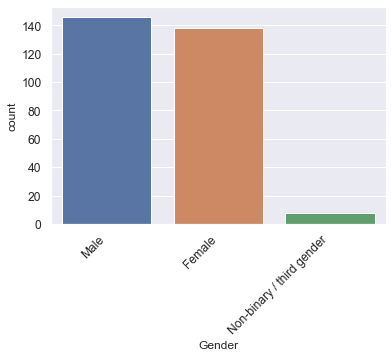

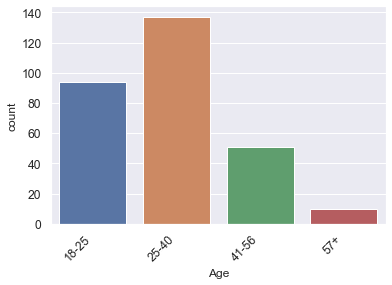

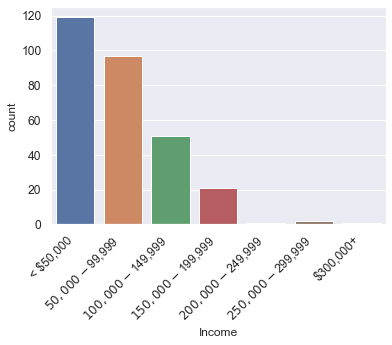

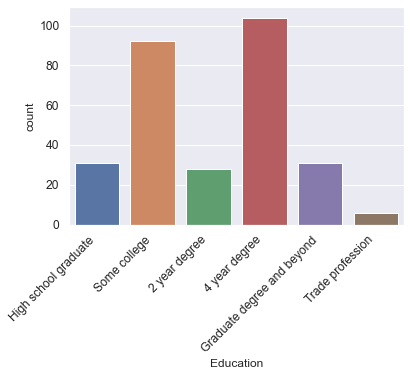

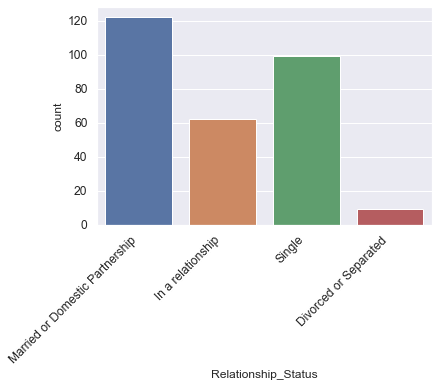

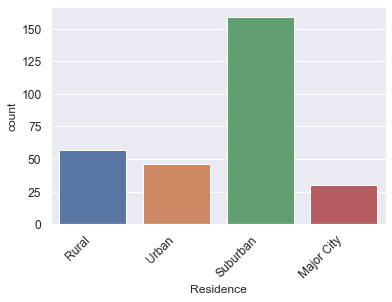

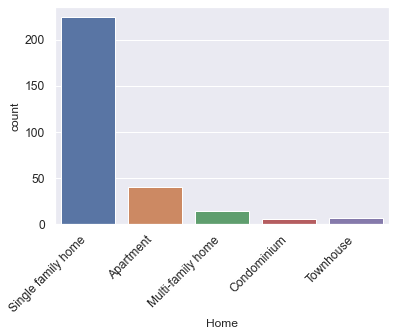

In [196]:
create_countplot("Gender")
create_countplot("Age", ["18-25", "25-40", "41-56", "57+"])
create_countplot("Income",
                 [
                     '< $50,000', 
                     '$50,000 -$99,999', 
                     '$100,000 - $149,999',
                     '$150,000 - $199,999', 
                     '$200,000 - $249,999',
                     '$250,000 - $299,999', 
                     '$300,000+',
                 ]
                )
create_countplot("Education", 
                 [
                     'High school graduate',
                     'Some college', 
                     '2 year degree', 
                     '4 year degree',
                     'Graduate degree and beyond', 
                     'Trade profession'
                 ]
                )
create_countplot("Relationship_Status")
create_countplot("Residence")
create_countplot("Home")

## Dog Information

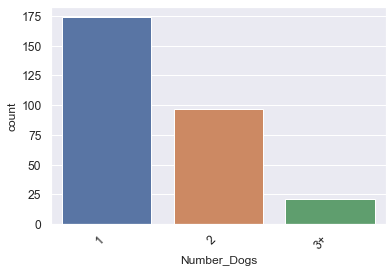

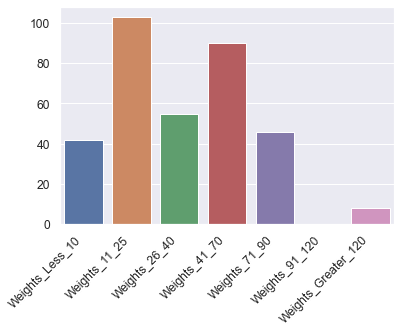

In [104]:
#Number_Dogs                        object
#Dog_Weights                        object
#Weights_Less_10                      bool
#Weights_11_25                        bool
#Weights_26_40                        bool
#Weights_41_70                        bool
#Weights_71_90                        bool
#Weights_91_120                       bool
#Weights_Greater_120                  bool
create_countplot("Number_Dogs", ["1", "2", "3+"])

columns = ["Weights_Less_10", 
           "Weights_11_25",
           "Weights_26_40",
           "Weights_41_70",
           "Weights_71_90",
           "Weights_91_120", 
           "Weights_Greater_120"];
Weights = survey_data[survey_data==True][columns].count();
chart = sns.barplot(y=Weights.values, x=Weights.index);
rotate_xlabels(chart)
save_figure(chart.get_figure(), 'Dog_Weights');

## Other Information

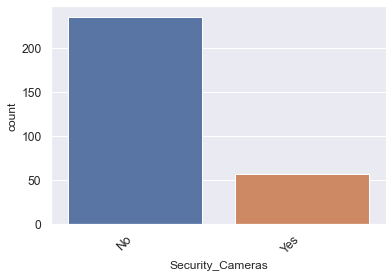

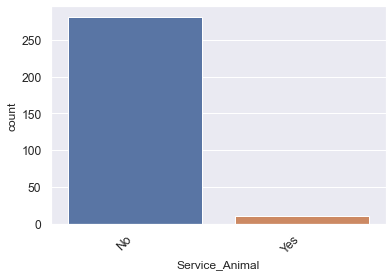

In [171]:
#Security_Cameras                   object
#Service_Animal                     object
create_countplot("Security_Cameras", NO_YES)
create_countplot("Service_Animal", NO_YES)

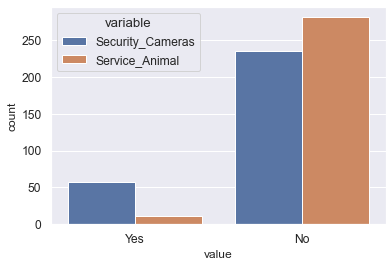

In [170]:
columns = ["Security_Cameras", "Service_Animal"]
other_combined = pd.melt(survey_data[columns])
chart = sns.countplot(data=other_combined, x="value", hue="variable")
increase_axes(chart);
save_figure(chart.get_figure(), "Other_Combined")
plt.show()

## Dog Spend

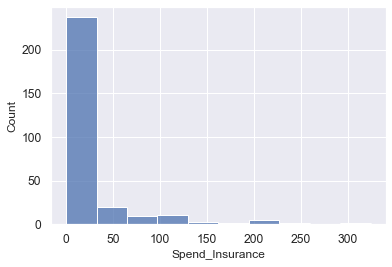

count    291.000000
mean      19.573883
std       48.304821
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      324.000000
Name: Spend_Insurance, dtype: float64

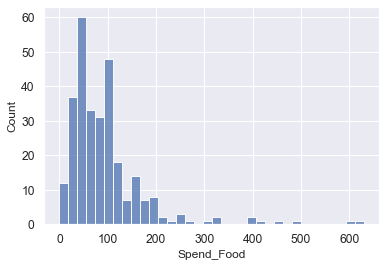

count    292.000000
mean      94.554795
std       83.882714
min        0.000000
25%       46.000000
50%       76.000000
75%      109.250000
max      630.000000
Name: Spend_Food, dtype: float64

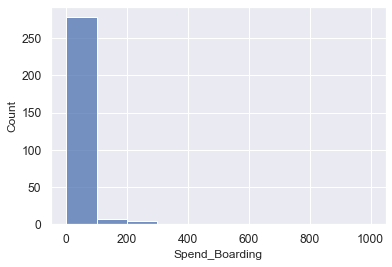

count     292.000000
mean       15.924658
std        73.290655
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1000.000000
Name: Spend_Boarding, dtype: float64

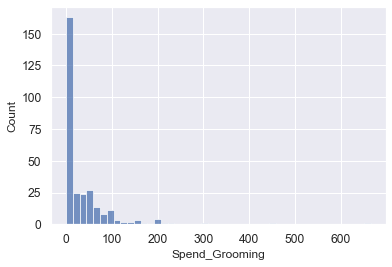

count    292.000000
mean      33.534247
std       64.536163
min        0.000000
25%        0.000000
50%        6.000000
75%       49.250000
max      665.000000
Name: Spend_Grooming, dtype: float64

In [109]:
#Spend_Insurance                   float64
#Spend_Food                        float64
#Spend_Boarding                    float64
#Spend_Grooming                    float64
column = "Spend_Insurance";
survey_data_filtered = survey_data[survey_data[column]<700][column]
create_histogram(survey_data_filtered, column)
display(survey_data_filtered.describe());
insurance = survey_data_filtered

column = "Spend_Food";
survey_data_filtered = survey_data[survey_data[column]<math.inf][column]
create_histogram(survey_data_filtered, column)
display(survey_data_filtered.describe());
food = survey_data_filtered

column = "Spend_Boarding";
survey_data_filtered = survey_data[survey_data[column]<math.inf][column]
create_histogram(survey_data_filtered, column)
display(survey_data_filtered.describe());

column = "Spend_Grooming";
survey_data_filtered = survey_data[survey_data[column]<math.inf][column]
create_histogram(survey_data_filtered, column)
display(survey_data_filtered.describe());

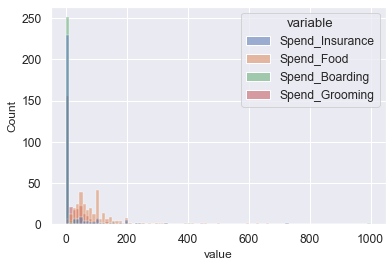

,Spend_Insurance,Spend_Food,Spend_Boarding,Spend_Grooming
count,292.000000,292.000000,292.000000,292.000000
mean,21.989726,94.554795,15.924658,33.534247
std,63.478626,83.882714,73.290655,64.536163
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,46.000000,0.000000,0.000000
50%,0.000000,76.000000,0.000000,6.000000
75%,0.000000,109.250000,0.000000,49.250000
max,725.000000,630.000000,1000.000000,665.000000


In [108]:
columns = ["Spend_Insurance", "Spend_Food", "Spend_Boarding", "Spend_Grooming"]
spend_combined = pd.melt(survey_data[columns])
chart = sns.histplot(data=spend_combined, x="value", hue="variable")
increase_axes(chart);
save_figure(chart.get_figure(), "Spend_Combined")
plt.show()

survey_data[columns].describe()

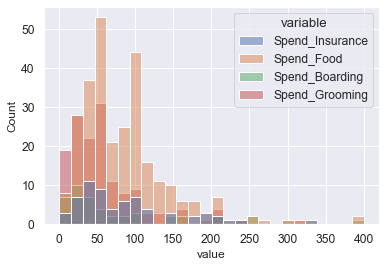

In [63]:
column="value"
spend_combined_filtered = spend_combined[spend_combined[column].between(1, 400)][["variable","value"]]
chart = sns.histplot(data=spend_combined_filtered, x="value", hue="variable")
increase_axes(chart);
save_figure(chart.get_figure(), "Spend_Combined_Filtered")

## Car Seats

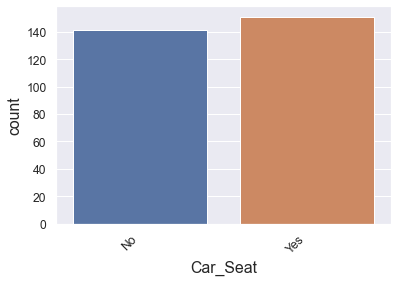

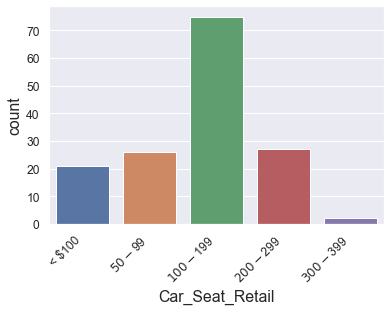

In [13]:
#Car_Seat                           object
#Car_Seat_Retail                    object
create_countplot("Car_Seat", NO_YES)
create_countplot("Car_Seat_Retail",
                [
                    '< $100', 
                    '$50 - $99',
                    '$100 - $199', 
                    '$200 - $299', 
                    '$300 - $399'
                ]
                )

## Activity

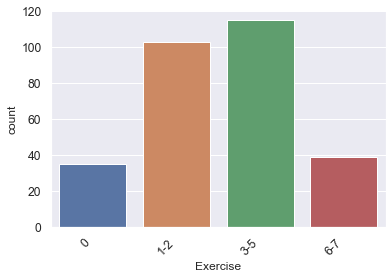

In [144]:
#Exercise                           object
#Activities_Walk                     int64
#Activities_Run                      int64
#Activities_Hunt                     int64
#Activities_Dog_Parks                int64
#Activities_Outdoor_Adventures       int64
#Activities_Shopping                 int64
#Activities_Vacation                 int64
#Walking_Assistance                 object
#Vehicle_Types                      object

create_countplot("Exercise", ["0", "1-2", "3-5", "6-7"])

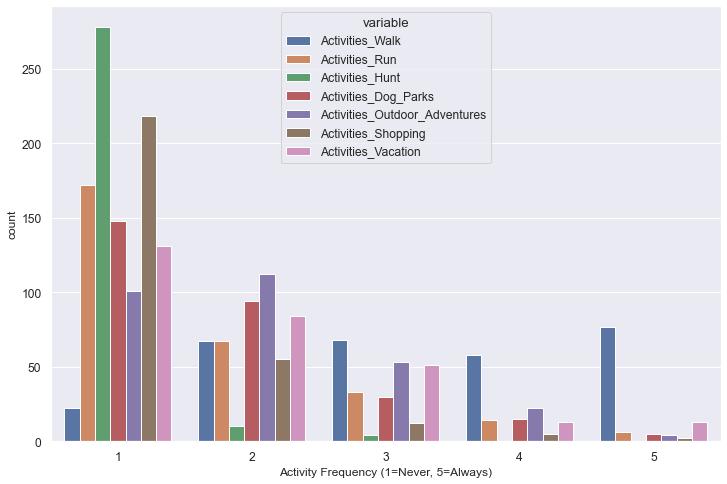

,Activities_Walk,Activities_Run,Activities_Hunt,Activities_Dog_Parks,Activities_Outdoor_Adventures,Activities_Shopping,Activities_Vacation
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,3.345890,1.681507,1.061644,1.750000,2.027397,1.349315,1.948630
std,1.292411,0.990297,0.292462,0.953831,0.977023,0.704355,1.097059
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
75%,5.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000
max,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000


In [197]:
columns = ["Activities_Walk", "Activities_Run", "Activities_Hunt", "Activities_Dog_Parks",
          "Activities_Outdoor_Adventures","Activities_Shopping","Activities_Vacation"]
activities_combined = pd.melt(survey_data[columns])

fig = plt.figure(figsize=(12,8));
chart = sns.countplot(data=activities_combined, x="value", hue="variable")
increase_axes(chart);
chart.set_xlabel("Activity Frequency (1=Never, 5=Always)")
save_figure(chart.get_figure(), "Activities")
plt.show()

survey_data[columns].describe()

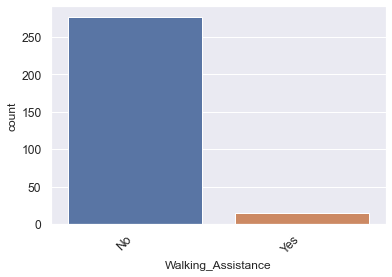

In [145]:
create_countplot("Walking_Assistance", NO_YES)

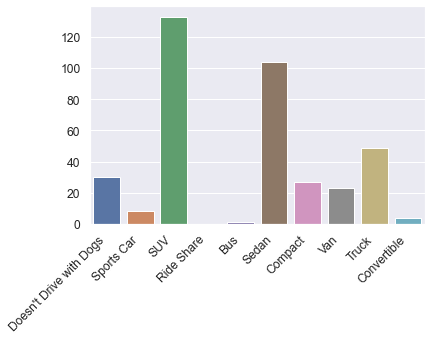

In [146]:
VEHICLE_NONE = "Doesn't Drive with Dogs"
VEHICLE_SPORTS = "Sports Car"
VEHICLE_SUV = "SUV"
VEHICLE_RIDE_SHARE = "Ride Share"
VEHICLE_BUS = "Bus"
VEHICLE_SEDAN = "Sedan"
VEHICLE_COMPACT = "Compact"
VEHICLE_VAN = "Van"
VEHICLE_TRUCK = "Truck"
VEHICLE_CONVERTIBLE = "Convertible"

columns = [VEHICLE_NONE, VEHICLE_SPORTS, VEHICLE_SUV, VEHICLE_RIDE_SHARE, VEHICLE_BUS,
          VEHICLE_SEDAN, VEHICLE_COMPACT, VEHICLE_VAN, VEHICLE_TRUCK, VEHICLE_CONVERTIBLE]
vehicle_data = pd.DataFrame(columns=columns)
vehicle_data[VEHICLE_NONE] = survey_data["Vehicle_Types"].str.contains("do not")
vehicle_data[VEHICLE_SPORTS] = survey_data["Vehicle_Types"].str.contains("Sports")
vehicle_data[VEHICLE_SUV] = survey_data["Vehicle_Types"].str.contains("SUV")
vehicle_data[VEHICLE_RIDE_SHARE] = survey_data["Vehicle_Types"].str.contains("Taxi")
vehicle_data[VEHICLE_BUS] = survey_data["Vehicle_Types"].str.contains("Bus")
vehicle_data[VEHICLE_SEDAN] = survey_data["Vehicle_Types"].str.contains("Sedan")
vehicle_data[VEHICLE_COMPACT] = survey_data["Vehicle_Types"].str.contains("Compact")
vehicle_data[VEHICLE_VAN] = survey_data["Vehicle_Types"].str.contains("van")
vehicle_data[VEHICLE_TRUCK] = survey_data["Vehicle_Types"].str.contains("Truck")
vehicle_data[VEHICLE_CONVERTIBLE] = survey_data["Vehicle_Types"].str.contains("Convertible")

Vehicles = vehicle_data[vehicle_data==True][columns].count();
chart = sns.barplot(y=Vehicles.values, x=Vehicles.index);
rotate_xlabels(chart)
save_figure(chart.get_figure(), 'Vehicles');

## Concerns

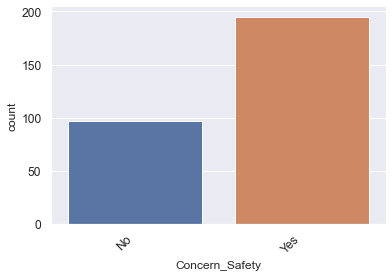

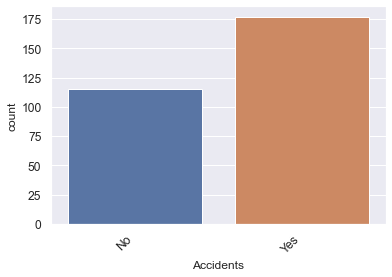

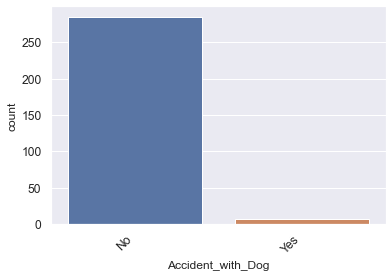

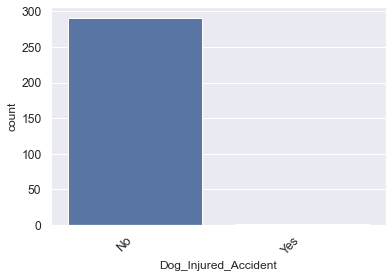

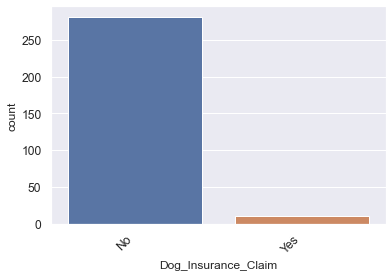

In [173]:
#Concern_Safety                     object
#Accidents                          object
#Accident_with_Dog                  object
#Dog_Injured_Accident               object
#Dog_Insurance_Claim                object
create_countplot("Concern_Safety", NO_YES)
create_countplot("Accidents", NO_YES)
create_countplot("Accident_with_Dog", NO_YES)
create_countplot("Dog_Injured_Accident", NO_YES)
create_countplot("Dog_Insurance_Claim", NO_YES)

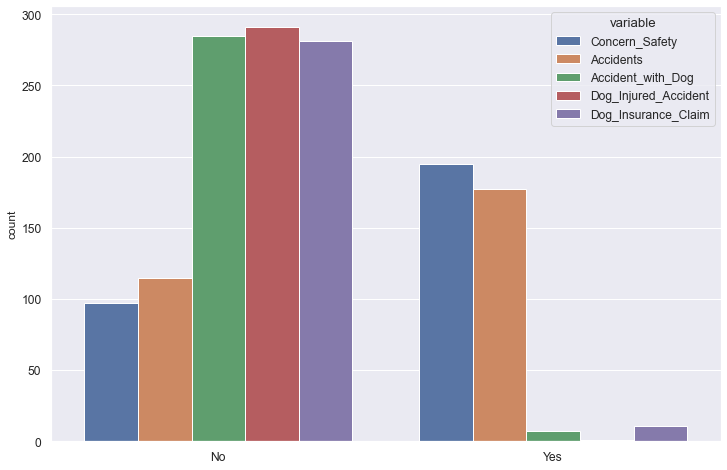

In [179]:
columns = ["Concern_Safety", "Accidents", "Accident_with_Dog", "Dog_Injured_Accident", "Dog_Insurance_Claim"]
concerns_combined = pd.melt(survey_data[columns])

fig = plt.figure(figsize=(12,8));
chart = sns.countplot(data=concerns_combined, x="value", hue="variable")
increase_axes(chart);
chart.set_xlabel("")
save_figure(chart.get_figure(), "Concerns_Combined")
plt.show()

## Restraint

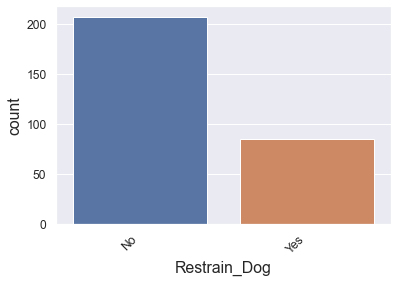

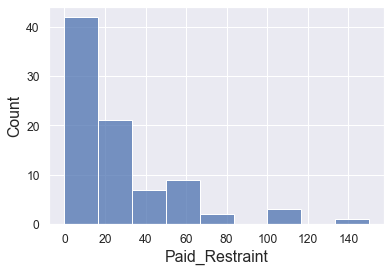

count     85.000000
mean      24.529294
std       28.733050
min        0.000000
25%        0.000000
50%       20.000000
75%       40.000000
max      150.000000
Name: Paid_Restraint, dtype: float64

In [16]:
# Restrain_Dog                       object
# Paid_Restraint                    float64
create_countplot("Restrain_Dog", NO_YES)

column = "Paid_Restraint";
create_histogram(survey_data[column], column)
survey_data[column].describe()

## Impact on Decision Making

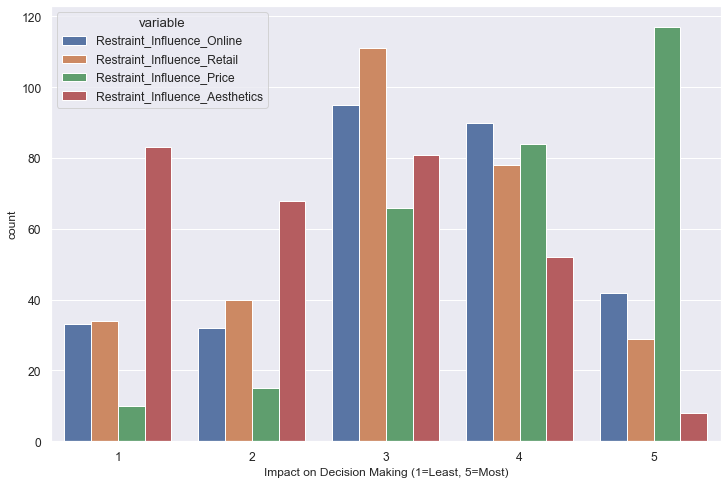

,Restraint_Influence_Online,Restraint_Influence_Retail,Restraint_Influence_Price,Restraint_Influence_Aesthetics
count,292.000000,292.000000,292.000000,292.000000
mean,3.260274,3.095890,3.969178,2.431507
std,1.175669,1.123499,1.069288,1.157124
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,1.000000
50%,3.000000,3.000000,4.000000,2.000000
75%,4.000000,4.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000


In [177]:
#Restraint_Influence_Online          int64
#Restraint_Influence_Retail          int64
#Restraint_Influence_Price           int64
#Restraint_Influence_Aesthetics      int64

columns = ["Restraint_Influence_Online", "Restraint_Influence_Retail", 
           "Restraint_Influence_Price", "Restraint_Influence_Aesthetics"]
influence_combined = pd.melt(survey_data[columns])

fig = plt.figure(figsize=(12,8));
chart = sns.countplot(data=influence_combined, x="value", hue="variable")
increase_axes(chart);
chart.set_xlabel("Impact on Decision Making (1=Least, 5=Most)")
save_figure(chart.get_figure(), "Influences")
plt.show()

survey_data[columns].describe()

## Feature Importance

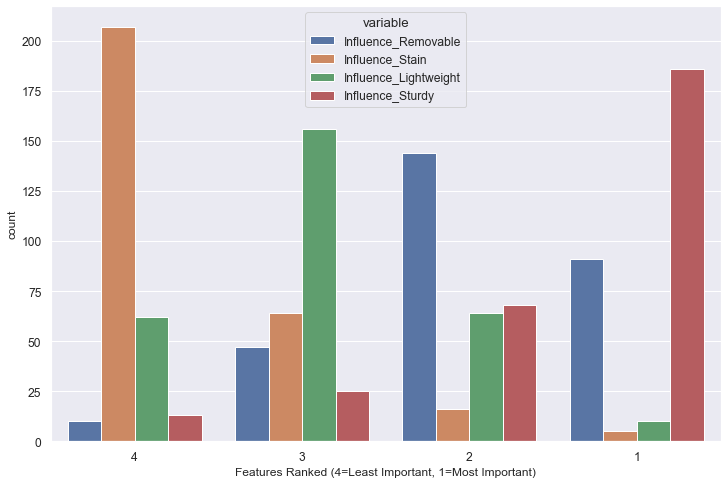

,Influence_Removable,Influence_Stain,Influence_Lightweight,Influence_Sturdy
count,292.000000,292.000000,292.000000,292.000000
mean,1.917808,3.619863,2.924658,1.537671
std,0.777756,0.670448,0.751499,0.830240
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,2.000000,1.000000
50%,2.000000,4.000000,3.000000,1.000000
75%,2.000000,4.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000


In [176]:
#Influence_Removable                 int64
#Influence_Stain                     int64
#Influence_Lightweight               int64
#Influence_Sturdy                    int64

columns = ["Influence_Removable", "Influence_Stain", 
           "Influence_Lightweight", "Influence_Sturdy"]
rank_combined = pd.melt(survey_data[columns])

fig = plt.figure(figsize=(12,8));
chart = sns.countplot(data=rank_combined, x="value", hue="variable", order=[4, 3, 2, 1])
increase_axes(chart);
chart.set_xlabel("Features Ranked (4=Least Important, 1=Most Important)")
save_figure(chart.get_figure(), "Ranked")
plt.show()

survey_data[columns].describe()

## Willingness to Pay

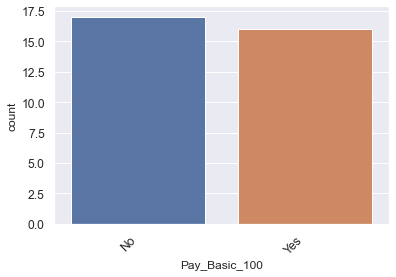

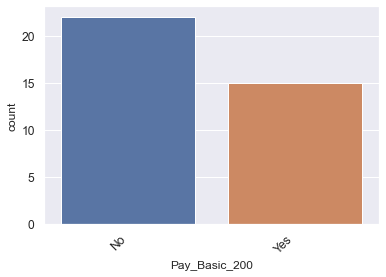

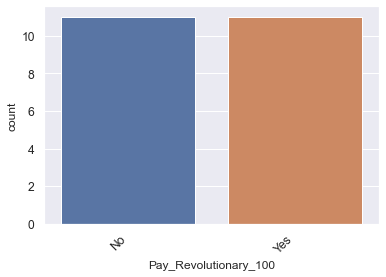

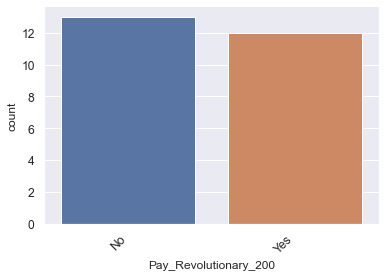

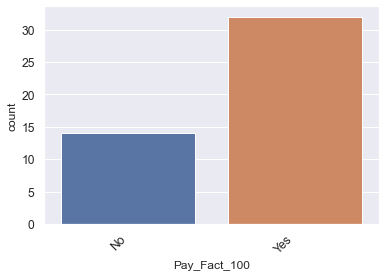

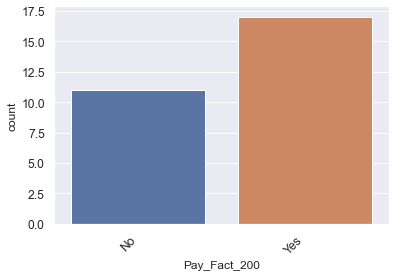

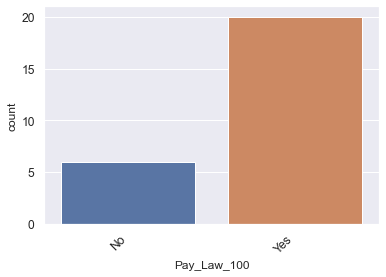

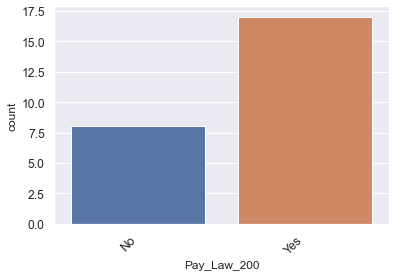

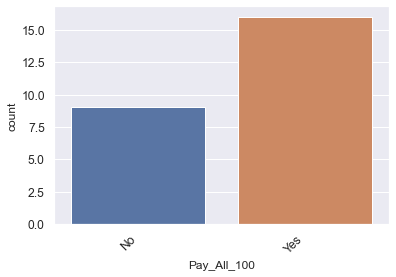

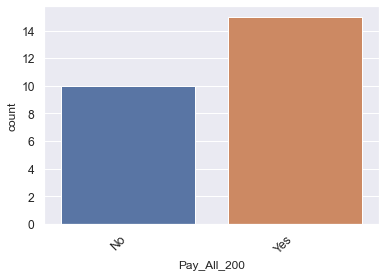

In [193]:
#Pay_Basic_100                      object
#Pay_Basic_200                      object
#Pay_Revolutionary_100              object
#Pay_Revolutionary_200              object
#Pay_Fact_100                       object
#Pay_Fact_200                       object
#Pay_Law_100                        object
#Pay_Law_200                        object
#Pay_All_100                        object
#Pay_All_200                        object
create_countplot("Pay_Basic_100", NO_YES)
create_countplot("Pay_Basic_200", NO_YES)
create_countplot("Pay_Revolutionary_100", NO_YES)
create_countplot("Pay_Revolutionary_200", NO_YES)
create_countplot("Pay_Fact_100", NO_YES)
create_countplot("Pay_Fact_200", NO_YES)
create_countplot("Pay_Law_100", NO_YES)
create_countplot("Pay_Law_200", NO_YES)
create_countplot("Pay_All_100", NO_YES)
create_countplot("Pay_All_200", NO_YES)

columns = ["Pay_Basic_100", "Pay_Basic_200", "Pay_Revolutionary_100", "Pay_Revolutionary_200",
           "Pay_Fact_100", "Pay_Fact_200", "Pay_Law_100", "Pay_Law_200", "Pay_All_100", "Pay_All_200"]
wtp_combined = pd.melt(survey_data[columns])

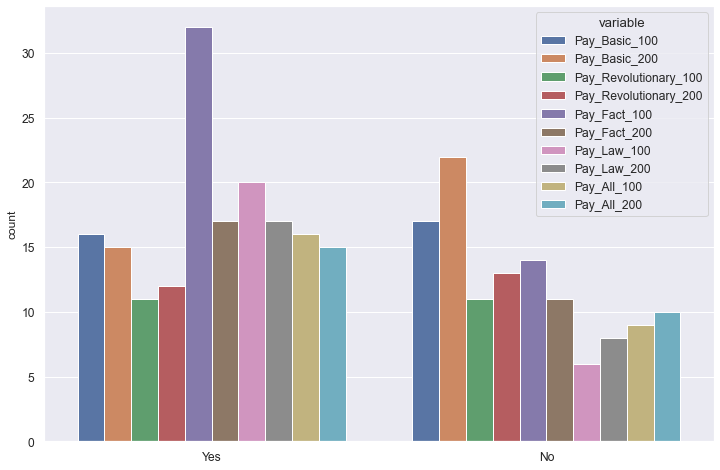

In [192]:
fig = plt.figure(figsize=(12,8));
chart = sns.countplot(data=wtp_combined, x="value", hue="variable")
increase_axes(chart);
chart.set_xlabel("")
save_figure(chart.get_figure(), "Willingness_To_Pay_Combined")
plt.show()

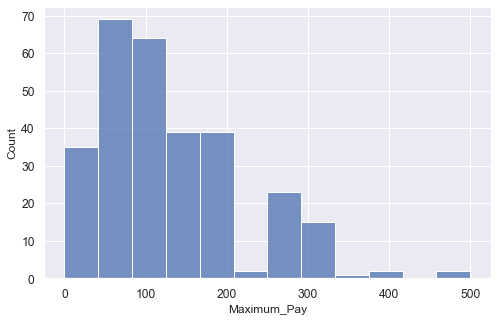

count    291.000000
mean     128.000000
std       89.642778
min        0.000000
25%       50.000000
50%      100.000000
75%      200.000000
max      500.000000
Name: Maximum_Pay, dtype: float64

In [187]:
column = "Maximum_Pay";
fig = plt.figure(figsize=(8,5));
survey_data_filtered = survey_data[survey_data[column]<1000][column]
create_histogram(survey_data_filtered, column)
survey_data_filtered.describe()

# Segmentation